# Select M dwarfs through heuristics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.io import fits
%config InlineBackend.figure_format='retina'

### Read in [Gaia-Kepler.fun](https://gaia-kepler.fun) 
A cross match of Gaia DR3 with Kepler by Meg Bedell

In [2]:
hdus = fits.open('../../data/Gaia/kepler_dr3_good.fits')

In [3]:
tab = Table()
for col in hdus[1].columns:
    tab[col.name] = hdus[1].data[col.name]

In [4]:
df = tab.to_pandas()

In [5]:
df.tail()

,kepid,ra_kic,dec_kic,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_mag_diff
196757,12984227,290.07986,52.453712,2139330189463960320,1434812375,290.079838,52.453692,0.246011,0.018616,13.214761,...,-0.484,DSEP,0,0,0,8.505,7.589,7.295,none,-0.332914
196758,12984288,290.11249,52.415588,2139329875927860736,662936371,290.112599,52.415592,0.005198,0.055361,0.093884,...,-0.157,DSEP,0,0,0,16.289,15.603,15.306,none,-0.235144
196759,12984307,290.12332,52.474621,2139330636140575616,923414311,290.123462,52.474735,1.779882,0.009830,181.061508,...,-0.375,DSEP,0,0,0,11.459,11.104,11.075,none,-0.035185
196760,12984404,290.17230,52.423828,2139329467909467008,595517067,290.172325,52.423856,0.707362,0.009949,71.101357,...,-2.250,DSEP,0,0,0,9.851,9.212,9.095,none,-0.027551
196761,12984422,290.18420,52.404362,2139329399189739392,1570613422,290.184199,52.404460,0.975763,0.024997,39.035137,...,-0.102,DSEP,0,0,0,14.314,13.814,13.747,none,-0.040604


### Criterion 1: $T_\mathrm{eff}$ and $\log{g}$ cuts

In [6]:
criterion1 = df.teff < 3400

In [7]:
criterion1.sum()

989

### Criterion 2: Logg

[]

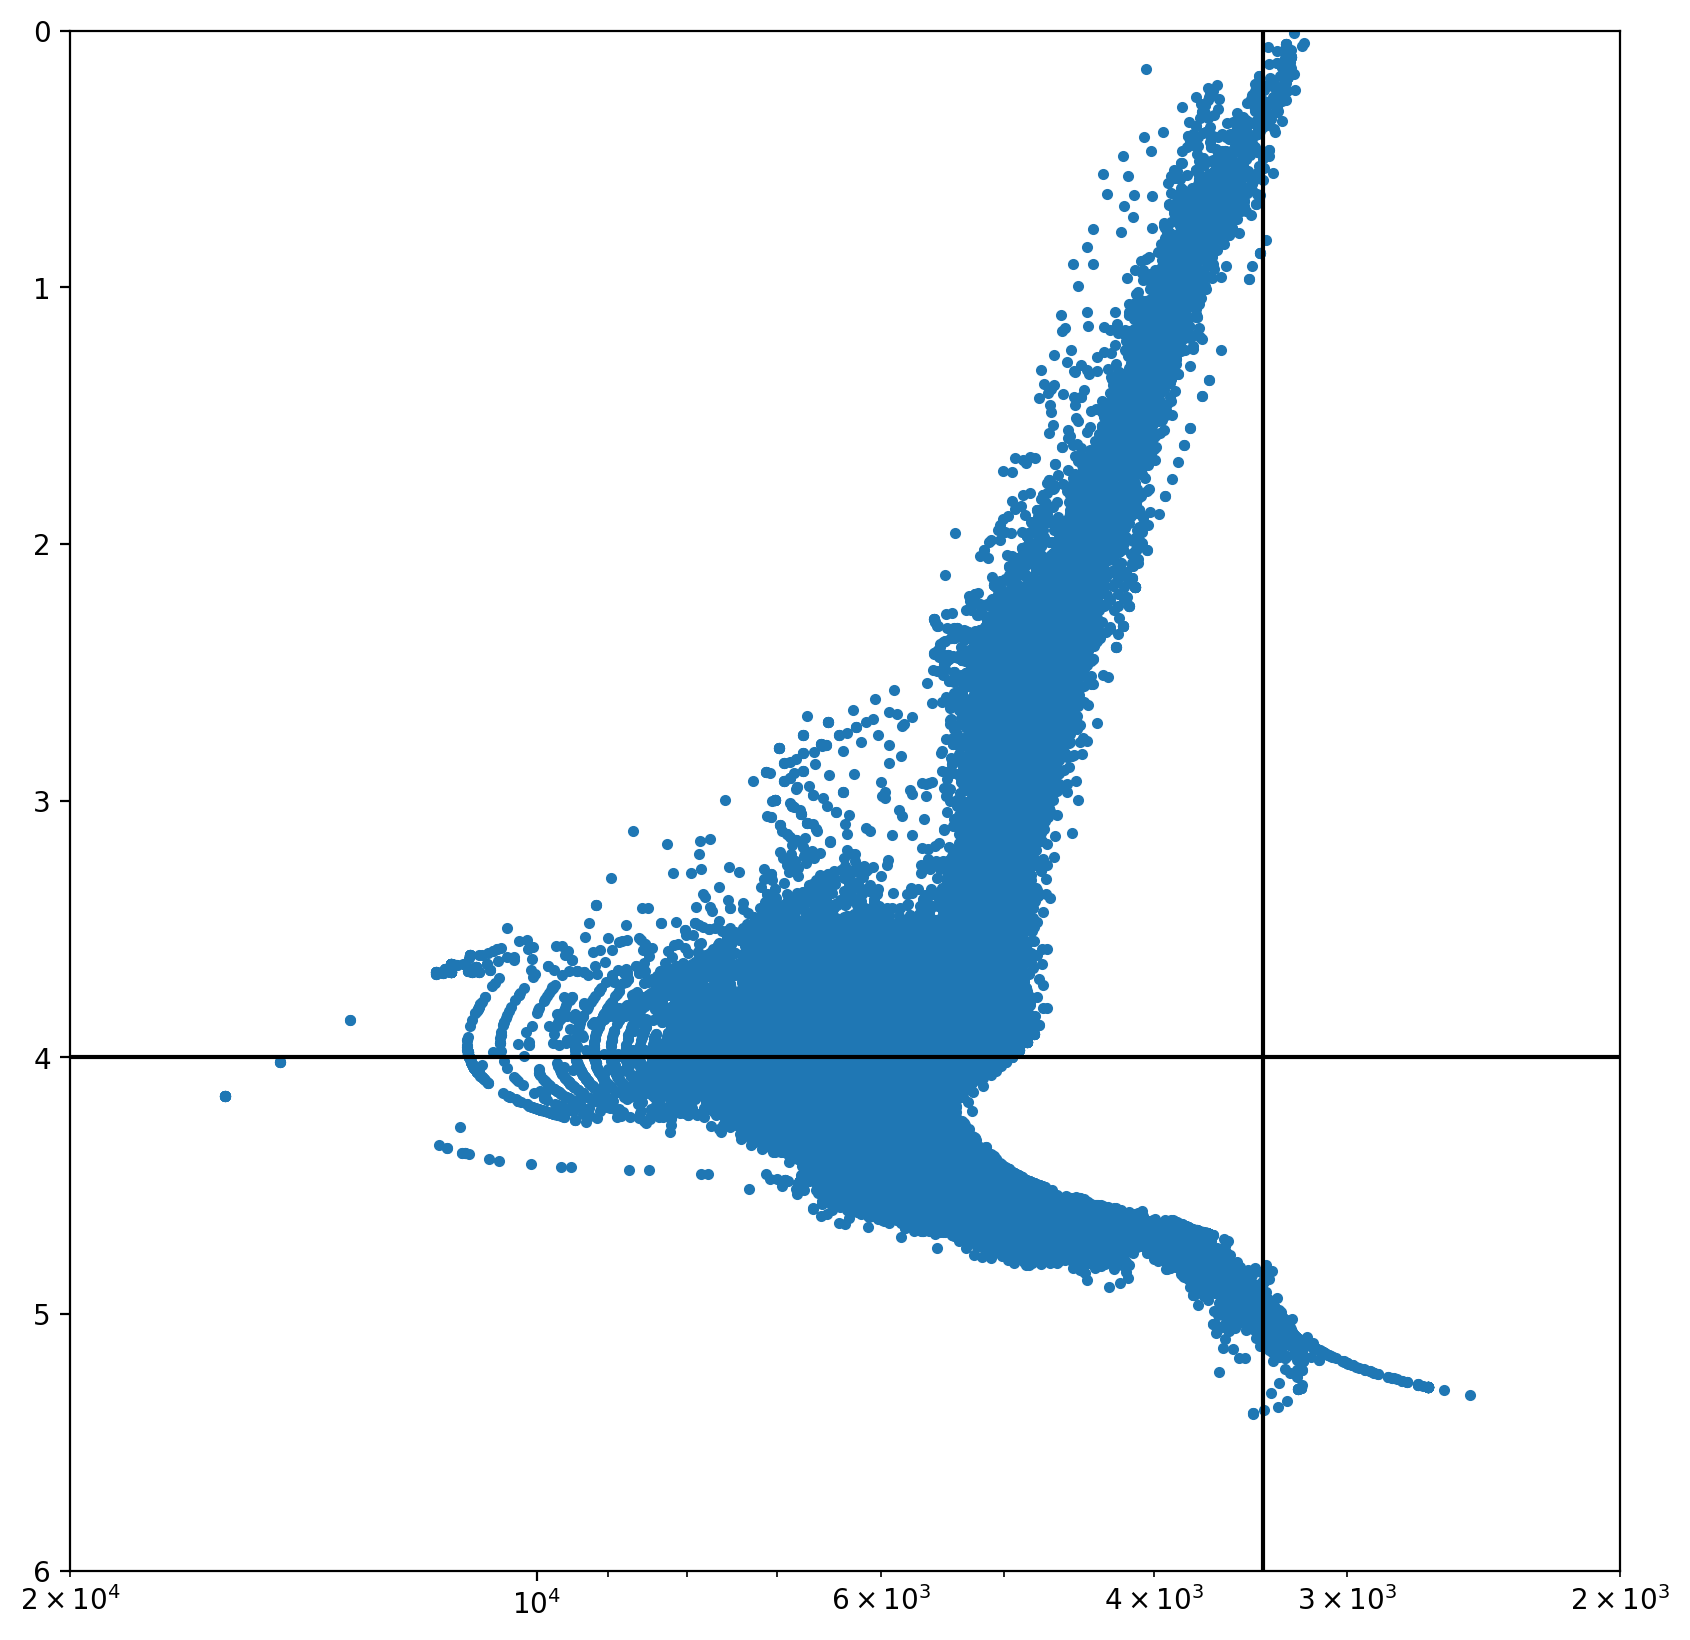

In [8]:
plt.figure(figsize=(10,10))
plt.plot(df.teff, df.logg, '.')
plt.xlim(20000, 2000)
plt.ylim(6, 0)
plt.axvline(3400, color='k')
plt.axhline(4, color='k')
plt.semilogx()

In [9]:
criterion2 = df.logg > 4.5

# 685 targets available

In [10]:
dataslice = df[criterion1 & criterion2]
sample = dataslice['kepid']

# Spot check a couple in FFIs

In [11]:
times = np.array([54945.74206,54945.8670833,54946.0182163,54946.2335259,54946.3377372,54946.5495655,
                  54946.7334679,54947.1662509,55062.8253608,55091.0055606,55123.0864583,55153.9797114,
                  55182.0366329,55215.9548927,55216.0352649,55245.7660019,55274.7398619,55307.5350333,
                  55336.4281441,55370.695297,55399.0571196,55430.8109392,55461.8291274,55492.8064711,
                  55522.7621353,55552.0843583,55585.5760016,55614.7389024,55677.4444762,55706.6440223,
                  55738.4591443,55769.477399,55801.7624176,55832.8010616,55864.8001316,55895.757043,
                  55930.8619526,55958.4268791,55986.5230115,56014.5579184,56047.5173675,56077.4525238,
                  56105.5895974,56137.5273556,56168.8315615,56203.8547584,56236.834641,56267.9141396,
                  56303.6729488,56330.563549,56357.495041,56390.4952381])

ffidata = pd.read_csv('../../data/f3/lc_data_new.out')

In [12]:
index = 123
kicid = sample.iloc[index]

Text(0.5, 1.0, '5941130')

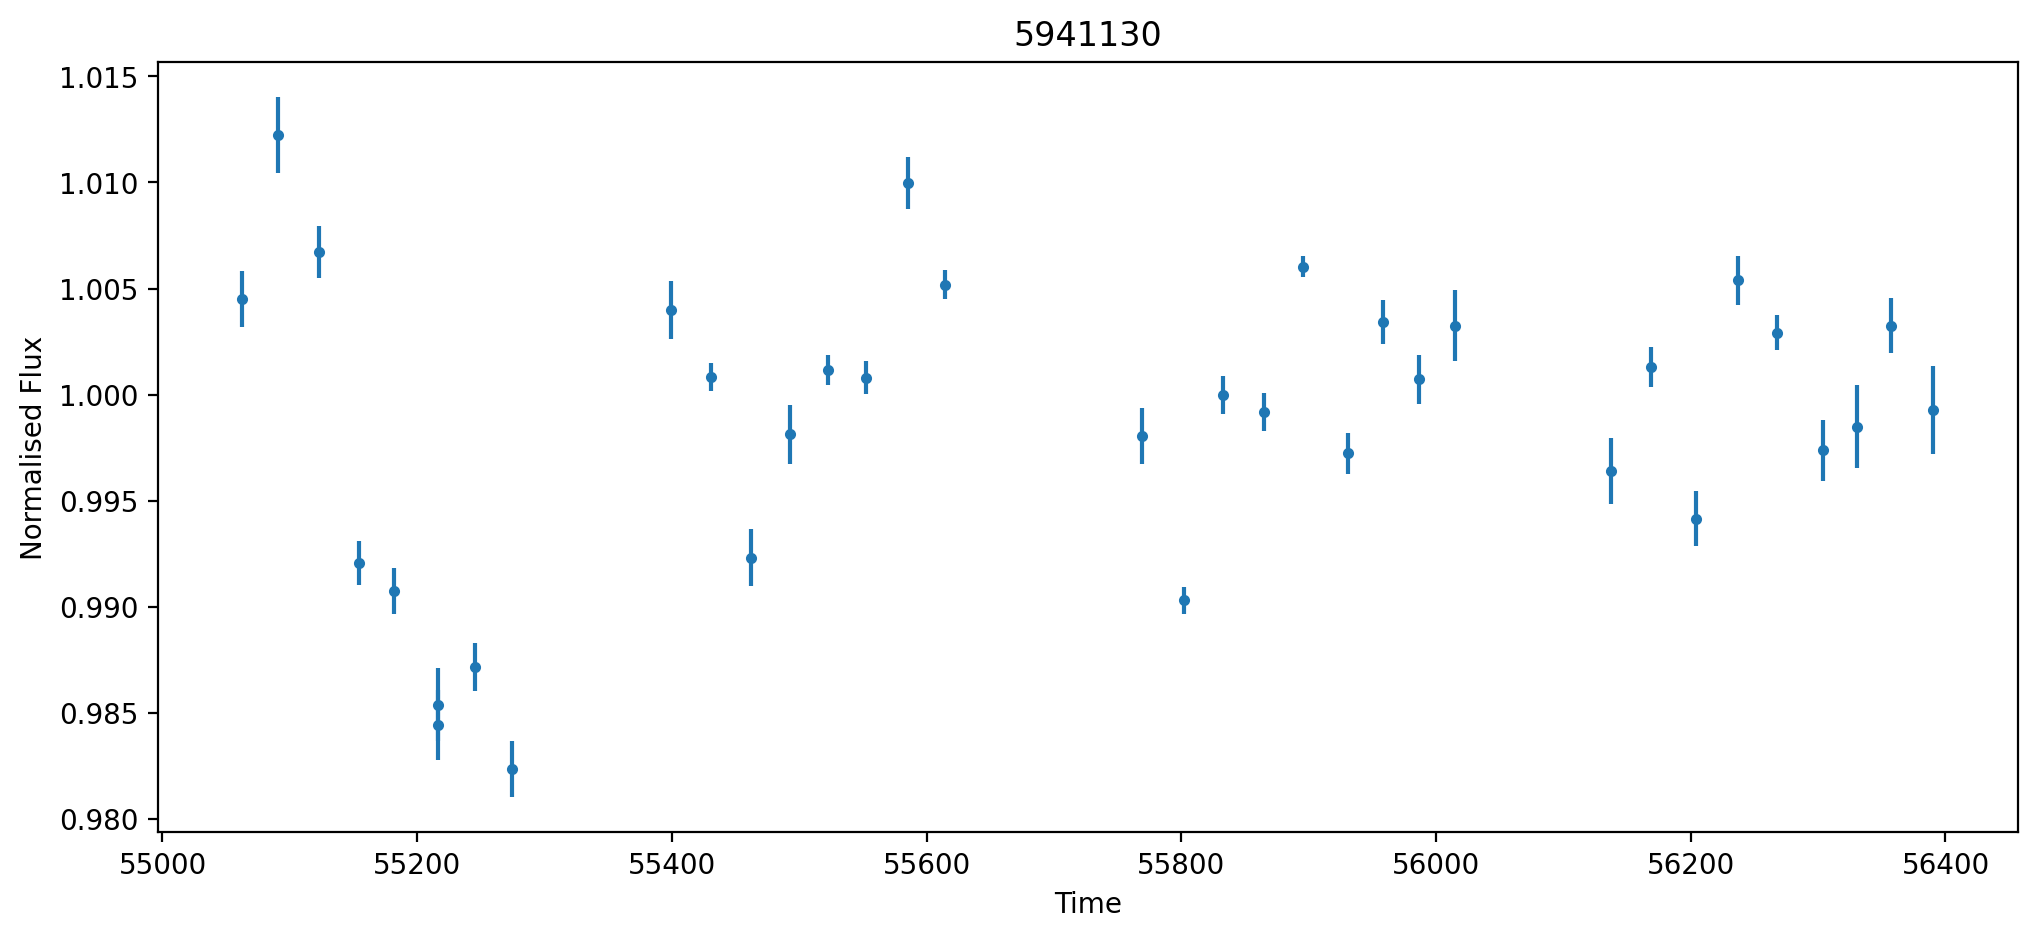

In [13]:
flux = ffidata[ffidata['KIC'] == kicid].iloc[:,1:53]
yerr = ffidata[ffidata['KIC'] == kicid].iloc[:,-52:]

plt.figure(figsize=(12,5))
plt.errorbar(times, np.asarray(flux)[0], yerr=np.asarray(yerr)[0], fmt='.')
plt.xlabel('Time')
plt.ylabel('Normalised Flux')
plt.title(kicid)

# let's get the rotation periods --- and the ones without measured rotation periods

In [14]:
rot_table = Table.read('../../data/literature/apjs492452t1_mrt.txt', format='cds').to_pandas()
no_rot_table = Table.read('../../data/literature/apjs492452t2_mrt.txt', format='cds').to_pandas()

rot_table['heritage'] = 1
no_rot_table['heritage'] = 2

In [15]:
combined_mcquillan = pd.concat([rot_table, no_rot_table], )

In [16]:
combined_mcquillan

,KIC,Teff,log(g),Mass,PRot,e_PRot,Rper,LPH,w,DC,Flag,heritage
0,892376,3813,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---,1
1,1026146,4261,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0,---,1
2,1026474,4122,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0,---,1
3,1162635,3760,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---,1
4,1164102,4045,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98995,12935010,4776,4.40,0.7756,29.986,3.730,NaN,0.269,0.1523,0,NaN,2
98996,12935127,4769,4.56,0.7737,NaN,NaN,NaN,NaN,NaN,0,NaN,2
98997,12984183,5176,4.49,0.8798,24.754,1.705,NaN,0.285,0.1650,0,NaN,2
98998,12984200,5621,4.46,0.9975,NaN,NaN,NaN,NaN,NaN,0,NaN,2


In [17]:
with_prot = pd.merge(dataslice, combined_mcquillan, left_on='kepid', right_on='KIC', how='left')

In [18]:
with_prot.heritage.value_counts(dropna=False)

NaN    436
1.0    173
2.0     76
Name: heritage, dtype: int64

In [19]:
with_prot[(with_prot.heritage==2) &(with_prot.PRot==with_prot.PRot)]['PRot']

3      54.200
11     60.882
28     44.423
43     50.032
45     52.623
72     55.212
91      0.644
97     69.382
118    55.163
122    46.186
127    49.621
128    44.251
143    66.800
162    52.504
226    31.948
265    50.870
307    50.195
378    46.865
405    62.476
410    12.597
441    66.973
481    42.042
484    34.869
496    31.978
499    61.549
599    64.048
632    37.479
649    47.227
650    49.726
669    69.034
678     2.994
Name: PRot, dtype: float64

### Spot check some of these long period ones

Text(0.5, 1.0, '4249500')

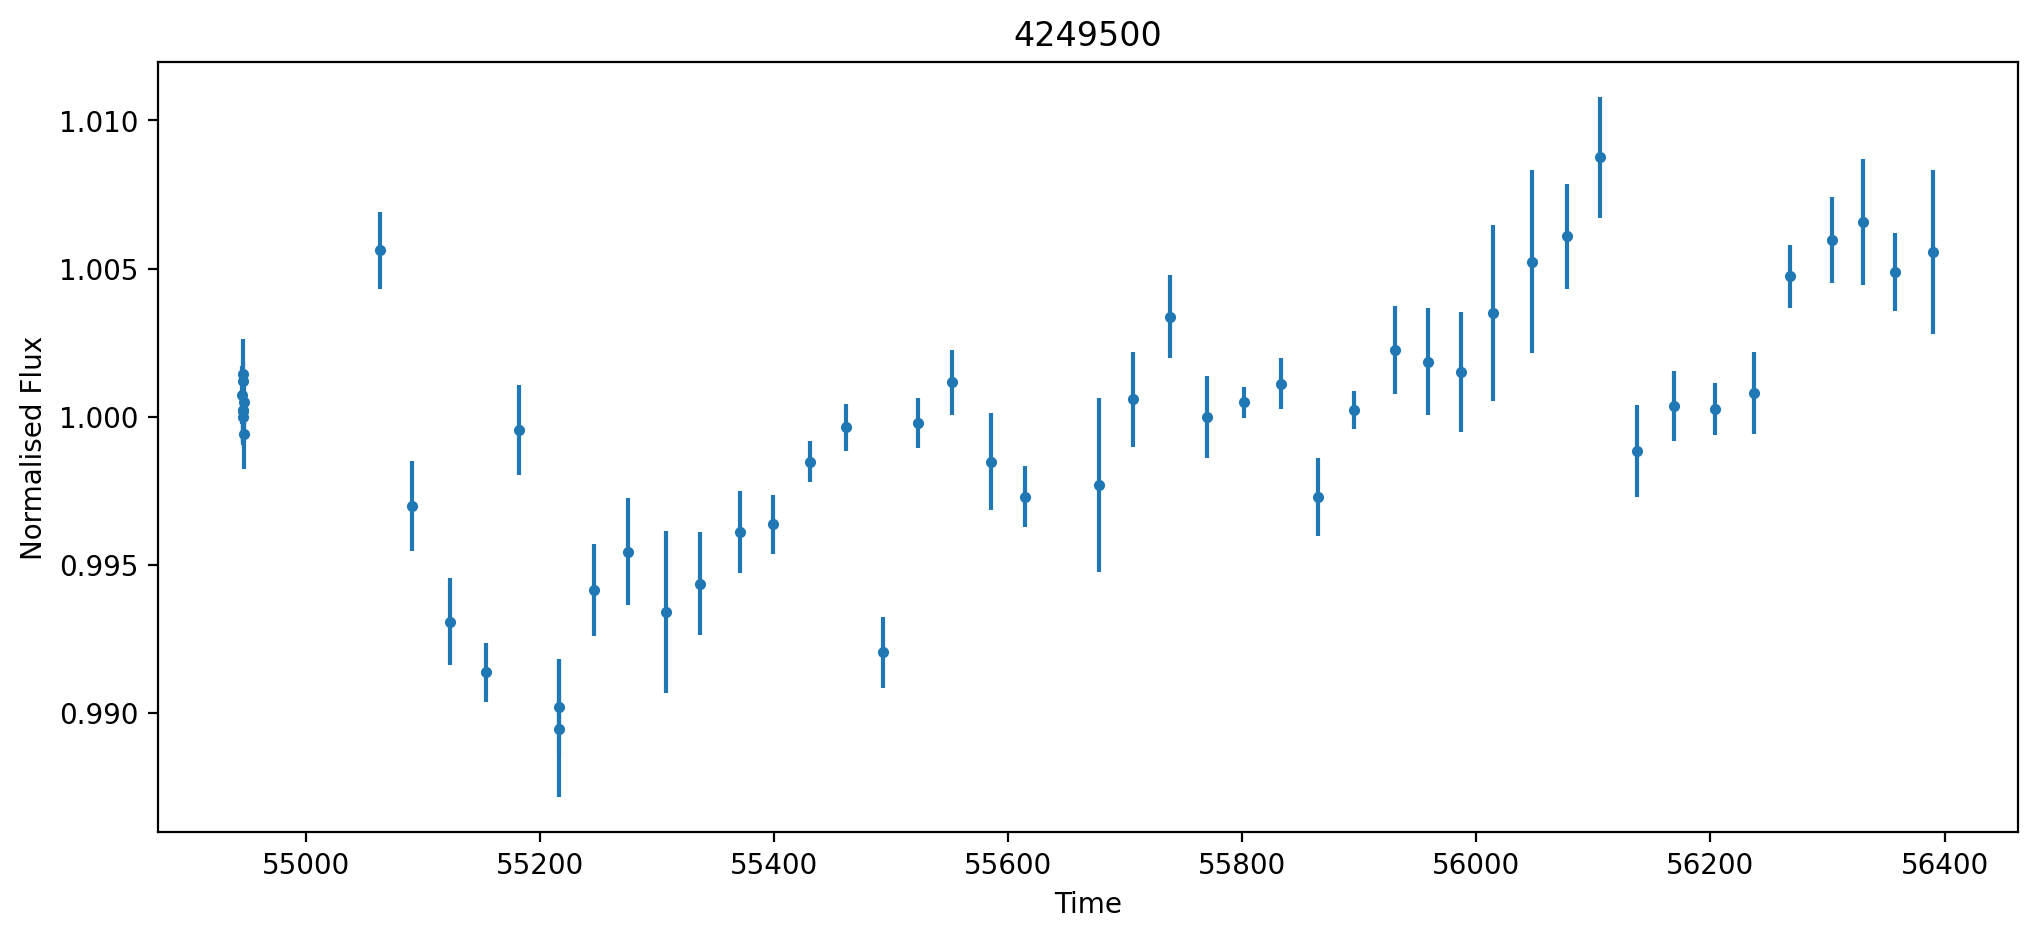

In [20]:
kepid = with_prot.iloc[43].kepid
flux = ffidata[ffidata['KIC'] == kepid].iloc[:,1:53]
yerr = ffidata[ffidata['KIC'] == kepid].iloc[:,-52:]

plt.figure(figsize=(12,5))
plt.errorbar(times, np.asarray(flux)[0], yerr=np.asarray(yerr)[0], fmt='.')
plt.xlabel('Time')
plt.ylabel('Normalised Flux')
plt.title(kepid)

### Add some summary statistics from the F3 lcs

In [21]:
with_prot['f3_std'] = np.NaN

In [22]:
for index in with_prot.index.values:
    kepid = with_prot.iloc[index].kepid
    flux = ffidata[ffidata['KIC'] == kepid].iloc[:,1:53]
    yerr = ffidata[ffidata['KIC'] == kepid].iloc[:,-52:]

    with_prot.loc[index, 'f3_std'] = np.std(np.asarray(flux)[0])

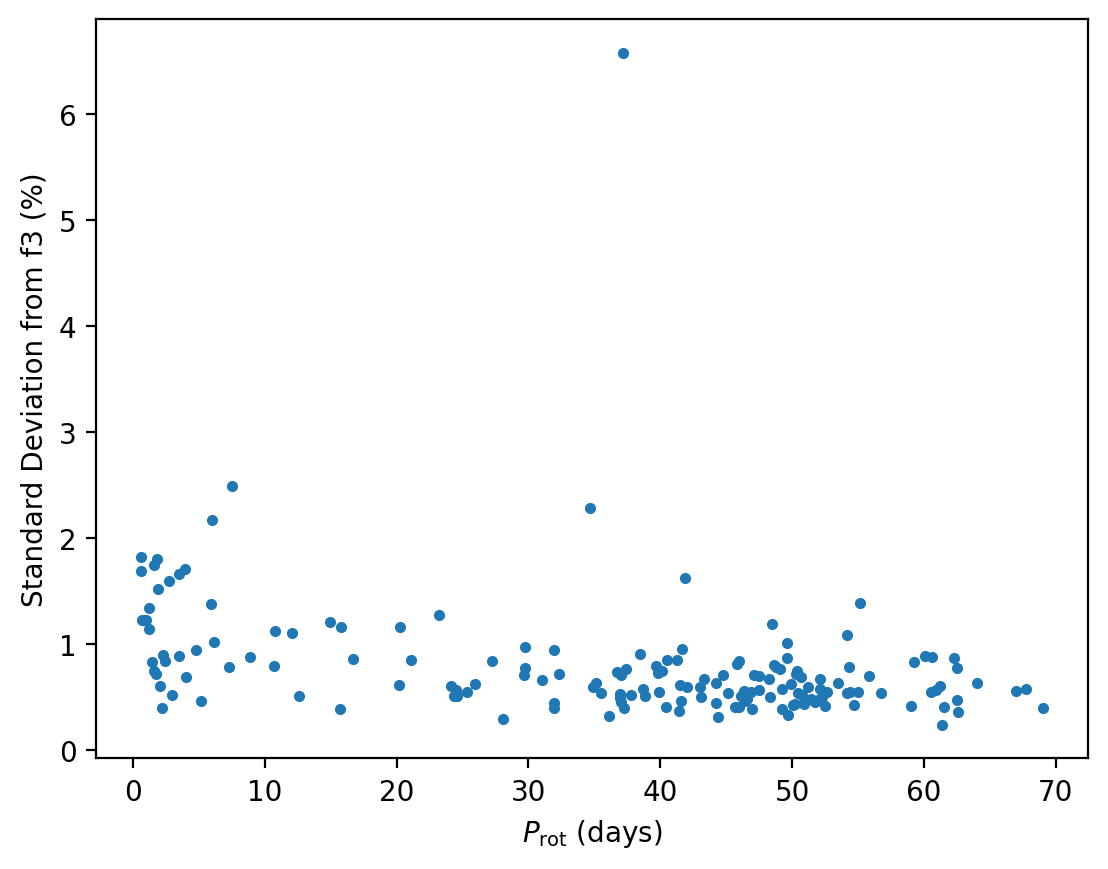

In [23]:
plt.plot(with_prot.PRot, with_prot.f3_std*100, '.')
plt.ylabel('Standard Deviation from f3 (%)')
plt.xlabel('$P_\mathrm{rot}$ (days)');

In [24]:
normalized_amp = with_prot.Rper/1e6

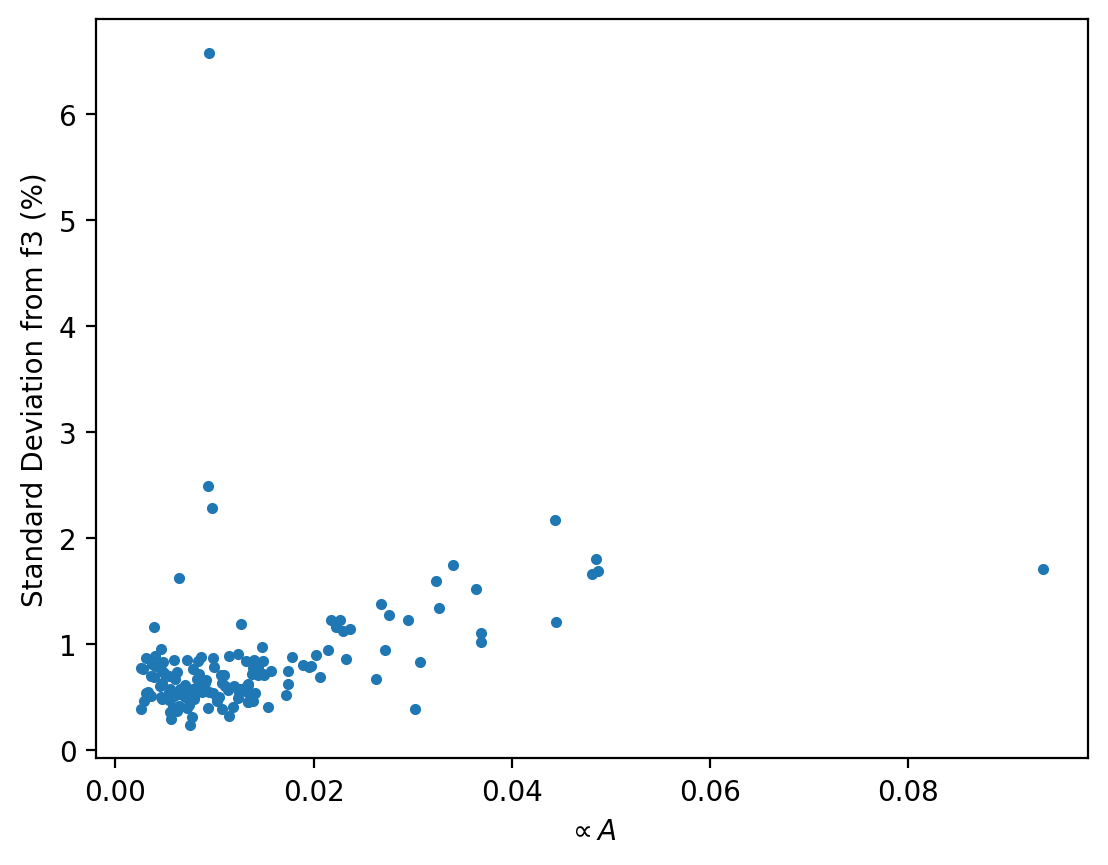

In [25]:
plt.plot(normalized_amp, with_prot.f3_std*100, '.')
plt.ylabel('Standard Deviation from f3 (%)')
plt.xlabel('$\propto A$');

In [26]:
mask = with_prot.f3_std>0.06

In [27]:
with_prot[mask]

,kepid,ra_kic,dec_kic,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,...,Mass,PRot,e_PRot,Rper,LPH,w,DC,Flag,heritage,f3_std
114,5818116,298.57895,41.060162,2073817129165489664,541202771,298.578749,41.059947,8.031438,0.022117,363.128387,...,0.2827,37.16,0.078,9453.95,1.425,0.6709,1.0,---,1.0,0.065761
235,7691437,294.70111,43.356335,2077988676275617408,1526283820,294.701982,43.355350,37.376115,0.048383,772.499634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065627
335,8935942,284.27579,45.269489,2106814263376434176,1531952488,284.276071,45.269997,7.830693,0.050056,156.437775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546426
560,10860741,291.59116,48.249348,2129324530573463552,1357341397,291.590458,48.249196,32.472948,0.015318,2119.975586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065292
664,12215115,295.01419,50.890072,2135573639269338112,1459546271,295.013640,50.889611,4.469197,0.057821,77.293381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075279


In [28]:
with_prot

,kepid,ra_kic,dec_kic,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,...,Mass,PRot,e_PRot,Rper,LPH,w,DC,Flag,heritage,f3_std
0,1293177,291.06366,36.994308,2050260126894870784,872163627,291.064017,36.994678,6.250708,0.037082,168.564774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009861
1,1433760,291.71573,37.004219,2051703579500387328,938920596,291.715515,37.004540,5.111446,0.051900,98.486061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006792
2,1873513,292.57986,37.376411,2051815759742763264,64764617,292.579856,37.376257,3.932769,0.026941,145.979294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003801
3,1995305,286.08368,37.477070,2099084353038385280,1678035828,286.083222,37.477462,7.229293,0.035464,203.850571,...,0.2778,54.200,12.275,NaN,0.307,0.1424,1.0,NaN,2.0,0.010854
4,2164791,292.42737,37.556019,2051832565958248192,1317036874,292.426510,37.554215,24.878714,0.087601,283.999939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,12689068,288.88269,51.870819,2133492504274425472,730990723,288.882760,51.870869,5.899738,0.037583,156.977478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010078
681,12691684,290.47098,51.880268,2139240338747455744,1214824113,290.470971,51.880136,4.644098,0.029919,155.224915,...,0.3061,38.476,0.758,12408.97,1.011,0.5695,1.0,---,1.0,0.009069
682,12735296,289.47437,51.962311,2133298337393746816,1797488006,289.474465,51.962512,4.121636,0.391690,10.522711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003441
683,12735831,289.82074,51.965393,2139288373661917696,555514972,289.821192,51.965815,14.691487,0.030921,475.123322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005699


In [29]:
mask.sum()

5

### What are these large amplitude `f3` variables?

(0.96, 1.04)

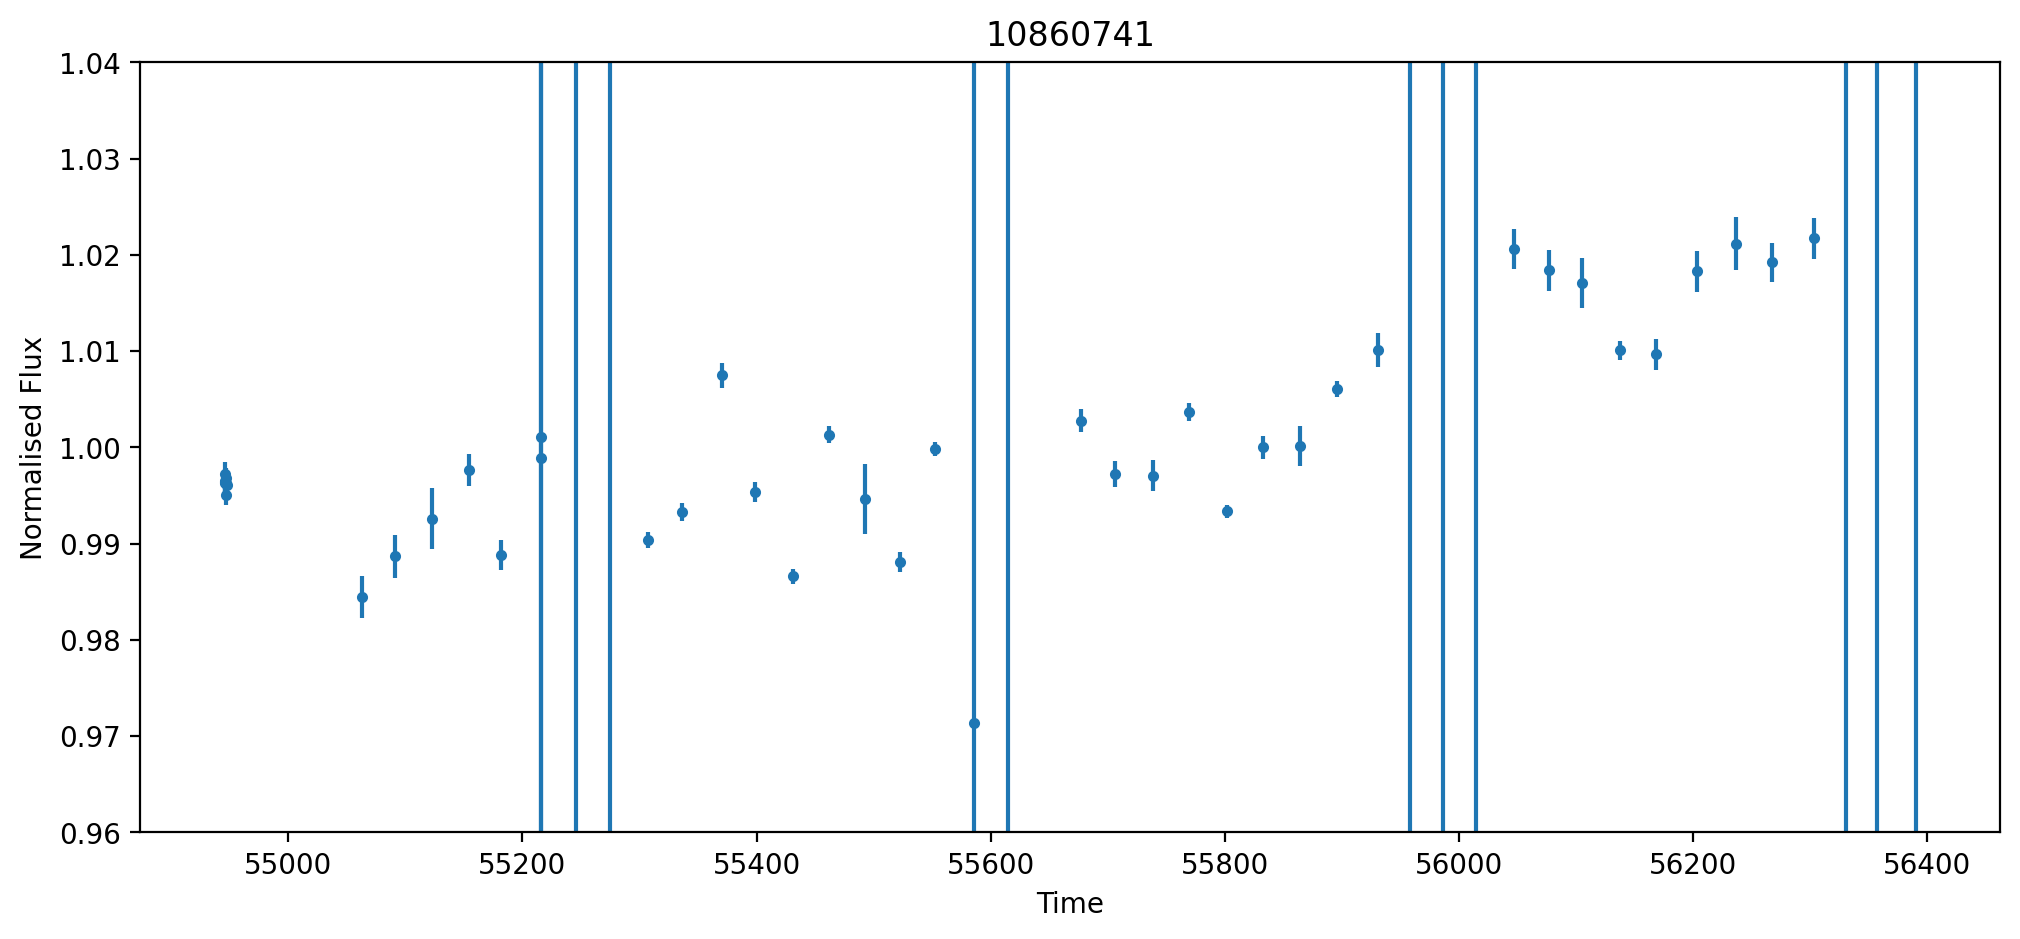

In [36]:
kepid = with_prot.iloc[560].kepid
flux = ffidata[ffidata['KIC'] == kepid].iloc[:,1:53]
yerr = ffidata[ffidata['KIC'] == kepid].iloc[:,-52:]

plt.figure(figsize=(12,5))
plt.errorbar(times, np.asarray(flux)[0], yerr=np.asarray(yerr)[0], fmt='.')
plt.xlabel('Time')
plt.ylabel('Normalised Flux')
plt.title(kepid)
plt.ylim(0.96, 1.04)

In [31]:
50*15

750